In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Load the uploaded AAPL stock data
file_path = "C:/Users/Membo/Downloads/malaria data.csv"
df = pd.read_csv(file_path)

# Display the first few rows to check the structure
df.head()

,Country,Year,No. of cases,No. of deaths,No. of cases_median,No. of cases_min,No. of cases_max,No. of deaths_median,No. of deaths_min,No. of deaths_max,WHO Region
0,Afghanistan,2017,630308[495000-801000],298[110-510],630308,495000.0,801000.0,298,110.0,510.0,Eastern Mediterranean
1,Algeria,2017,0,0,0,NaN,NaN,0,NaN,NaN,Africa
2,Angola,2017,4615605[3106000-6661000],13316[9970-16600],4615605,3106000.0,6661000.0,13316,9970.0,16600.0,Africa
3,Argentina,2017,0,0,0,NaN,NaN,0,NaN,NaN,Americas
4,Armenia,2017,0,0,0,NaN,NaN,0,NaN,NaN,Europe


In [8]:

# Import libraries
import pandas as pd
import plotly.express as px
import plotly.io as pio

# Set dark theme
pio.templates.default = 'plotly_dark'

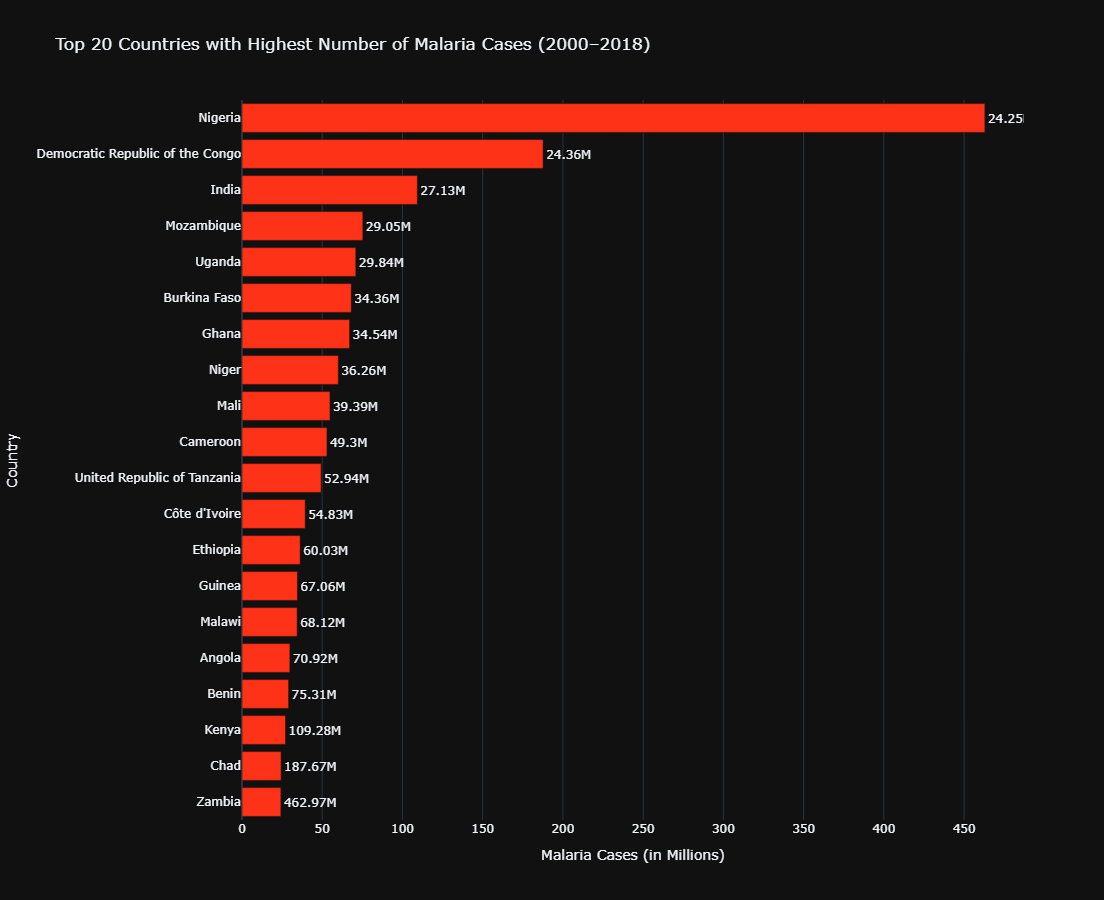

In [19]:
import plotly.express as px
import pandas as pd

# Assuming df is already loaded and "No. of cases" is numeric
# If it's not, you can uncomment the next line:
# df["No. of cases"] = pd.to_numeric(df["No. of cases"], errors="coerce")

# Group by country and sum
df_cases = df.groupby("Country", as_index=False)["No. of cases"].sum()

# Sort and select top 20
top20 = df_cases.sort_values("No. of cases", ascending=False).head(20)

# Convert to millions for readability
top20["Cases (millions)"] = top20["No. of cases"] / 1_000_000

# Create horizontal bar chart
fig = px.bar(
    top20.sort_values("Cases (millions)"),
    x="Cases (millions)",
    y="Country",
    text=top20["Cases (millions)"].round(2).astype(str) + "M",
    title="Top 20 Countries with Highest Number of Malaria Cases (2000–2018)",
    color_discrete_sequence=px.colors.qualitative.Light24,
    height=900,
    orientation="h"
)

fig.update_traces(textposition='outside')
fig.update_layout(xaxis_title="Malaria Cases (in Millions)")
fig.show()



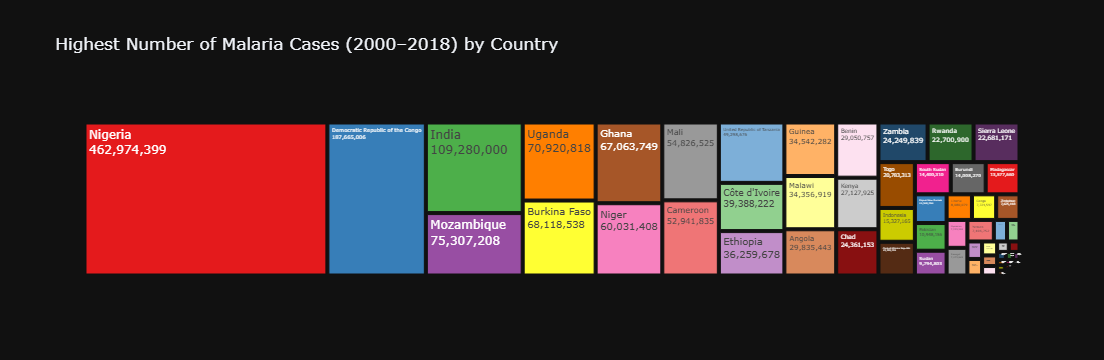

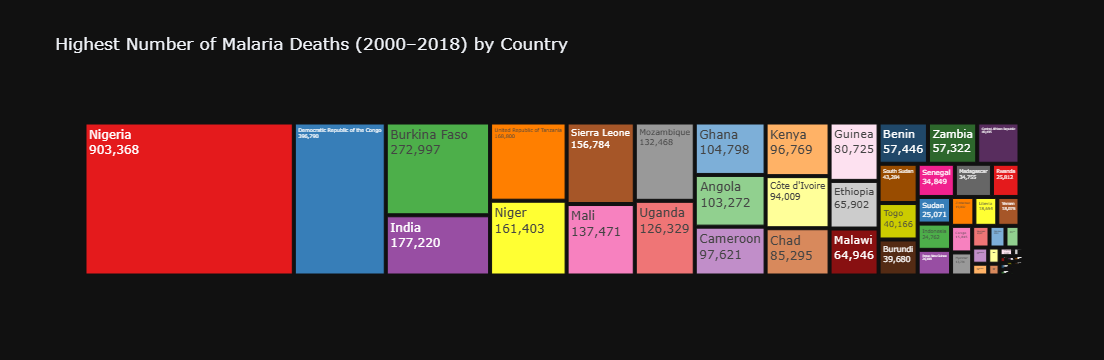

In [12]:

# Clean the 'No. of cases' column: extract numeric part before brackets
df["No. of cases"] = df["No. of cases"].str.extract(r"^(\d+)").astype(float)

# Clean the 'No. of deaths' column the same way (if it also has brackets)
df["No. of deaths"] = df["No. of deaths"].str.extract(r"^(\d+)").astype(float)


# Treemap for Cases
def plot_treemap_cases(dataframe, variable, value):
    df_tmap = dataframe.groupby(variable, as_index=False)[value].sum()
    fig = px.treemap(
        df_tmap.sort_values(by=value, ascending=False),
        path=[variable],
        values=value,
        title=f"Highest Number of Malaria Cases (2000–2018) by {variable}",
        color_discrete_sequence=px.colors.qualitative.Set1
    )
    fig.data[0].textinfo = 'label+text+value'
    fig.show()

# Treemap for Deaths
def plot_treemap_deaths(dataframe, variable, value):
    df_tmap = dataframe.groupby(variable, as_index=False)[value].sum()
    fig = px.treemap(
        df_tmap.sort_values(by=value, ascending=False),
        path=[variable],
        values=value,
        title=f"Highest Number of Malaria Deaths (2000–2018) by {variable}",
        color_discrete_sequence=px.colors.qualitative.Set1
    )
    fig.data[0].textinfo = 'label+text+value'
    fig.show()

# Call functions
plot_treemap_cases(df, "Country", "No. of cases")
plot_treemap_deaths(df, "Country", "No. of deaths")


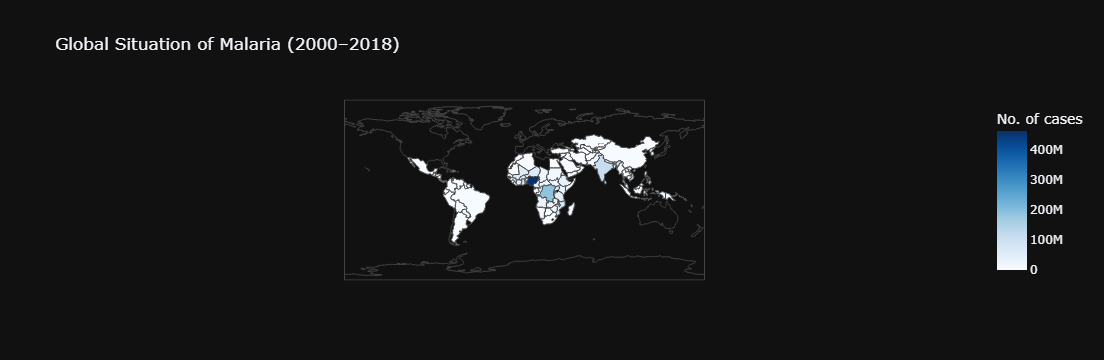

In [17]:
# Group for map
df_group = df.groupby("Country", as_index=False)[["No. of cases"]].sum()

fig = px.choropleth(
    df_group,
    locationmode="country names",
    locations="Country",
    hover_data=["Country", "No. of cases"],
    hover_name="Country",
    color="No. of cases",
    title="Global Situation of Malaria (2000–2018)",
    color_continuous_scale="Blues"
)
fig.show()
